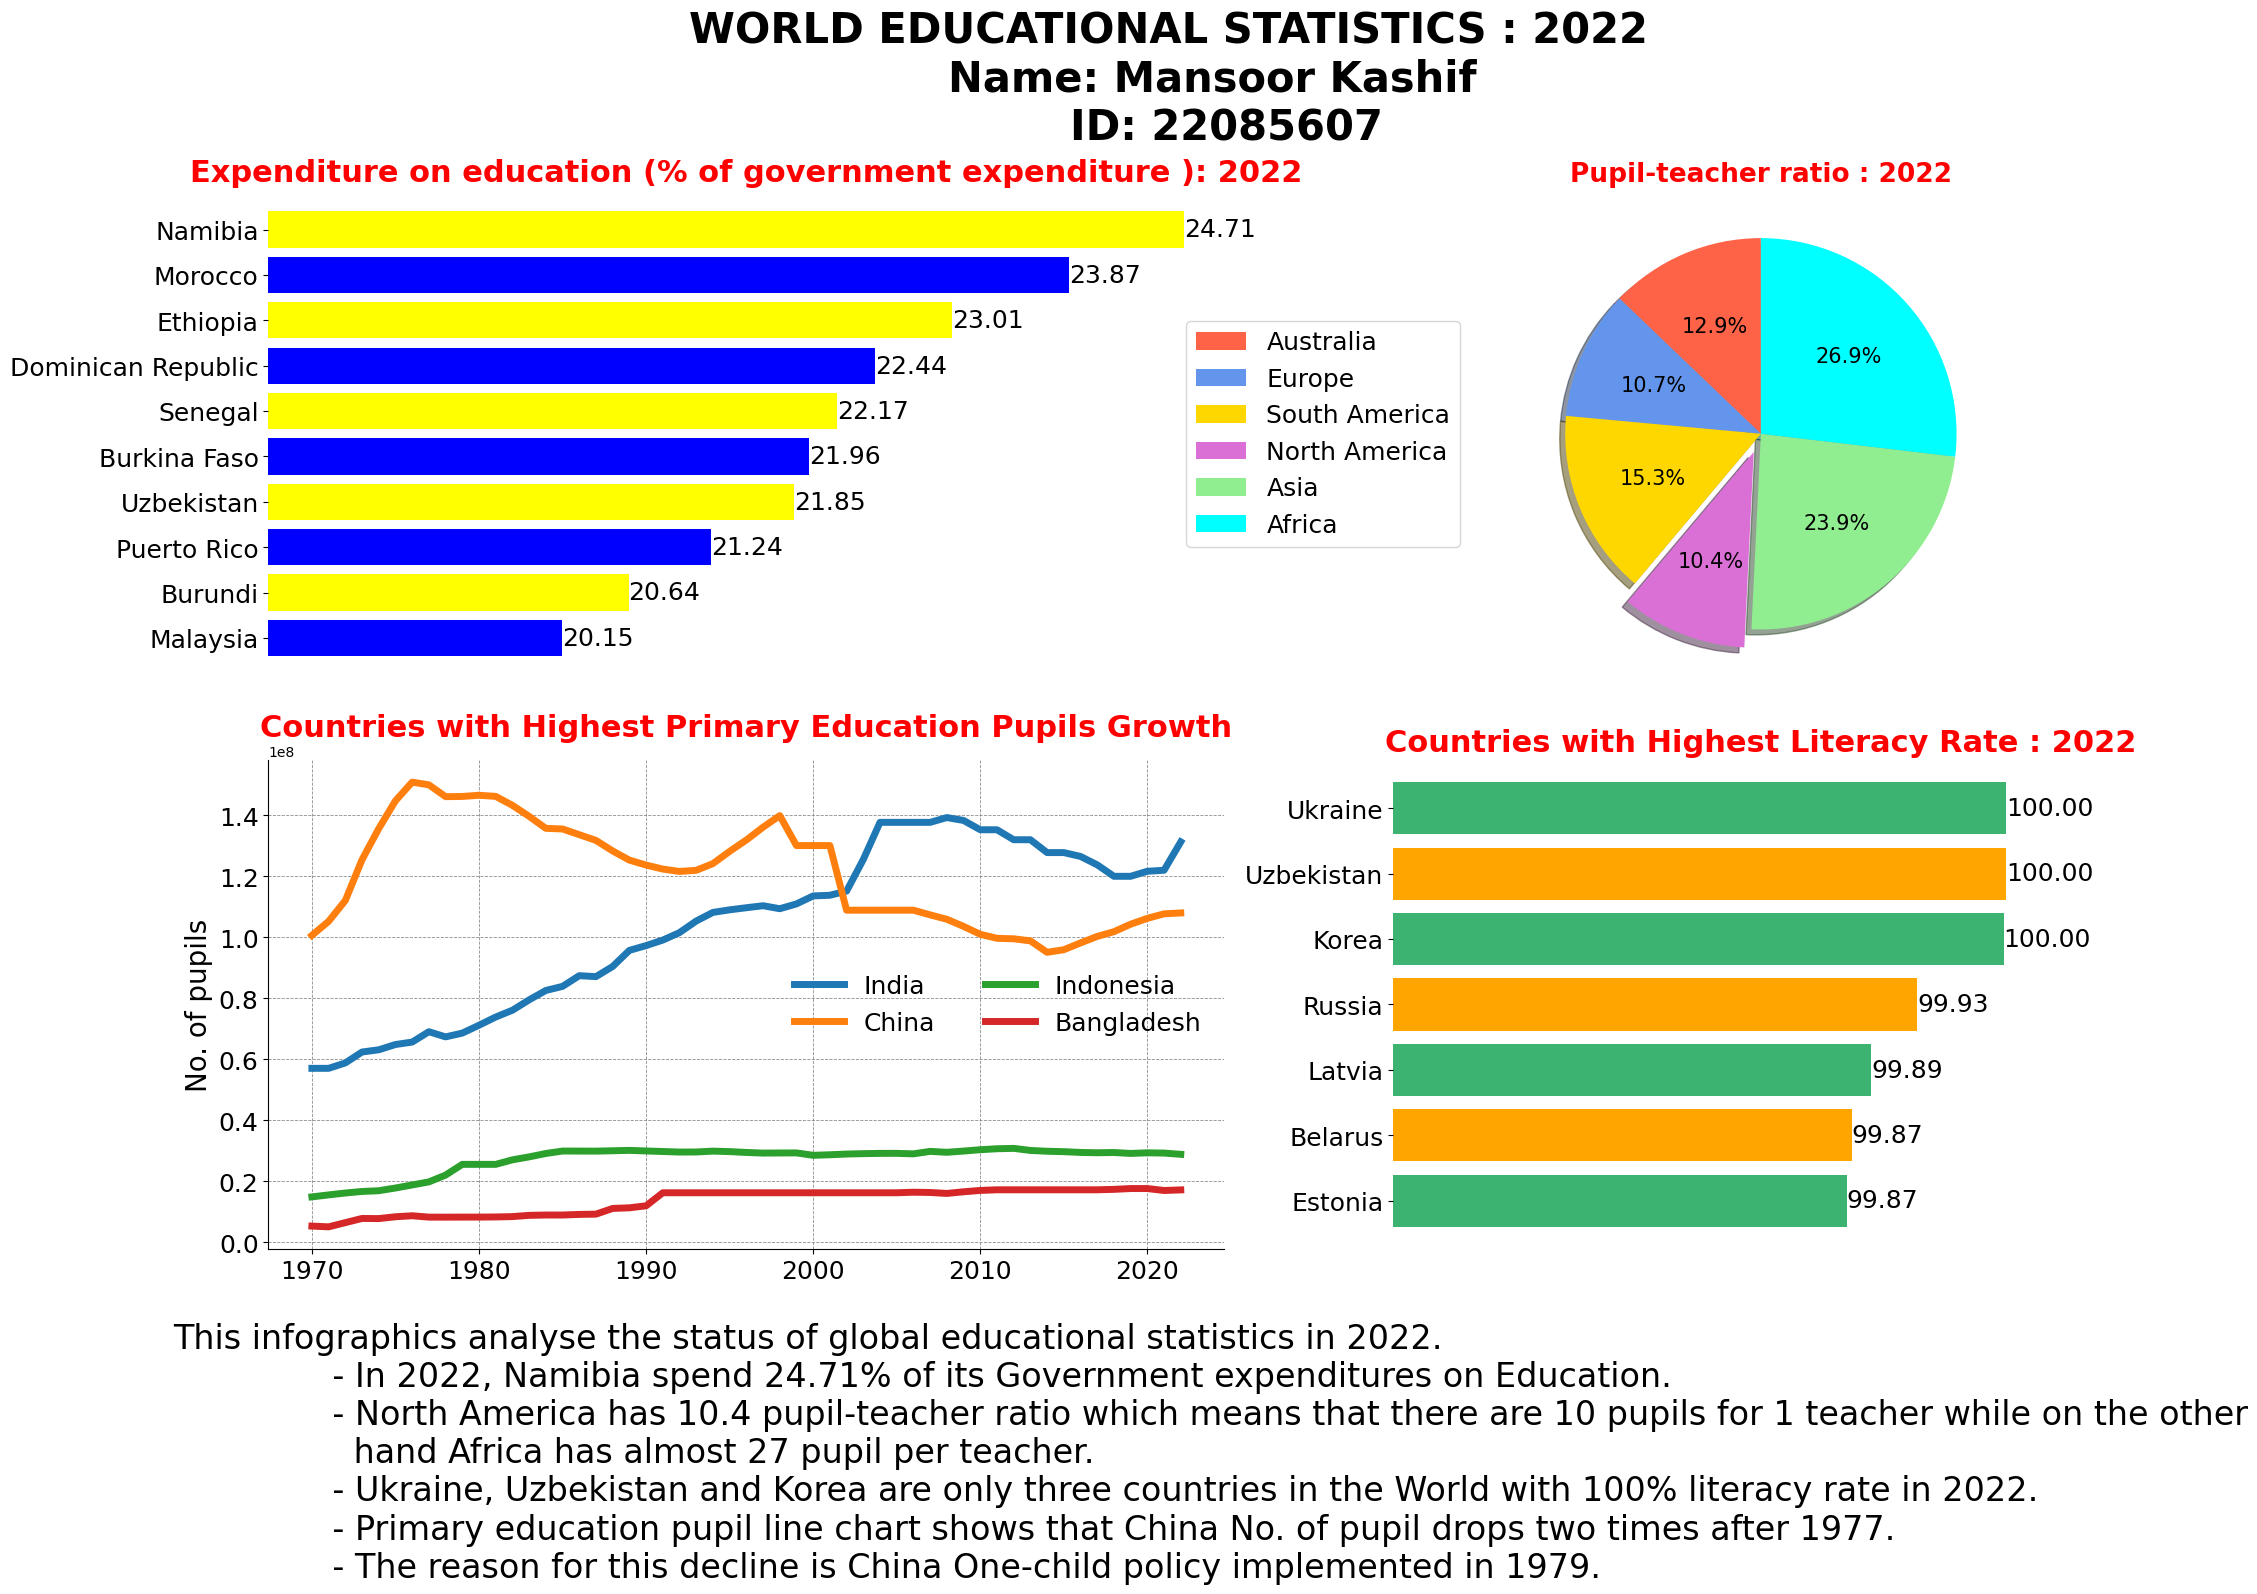

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#reading data file
data = pd.read_csv('data.csv', na_values=[ ".."], index_col=['Country Name', 'Series Name'])

#extracting the data for top 10 countries with max expenditure on education for 2022
df = data['2022']
df1 = df.reset_index('Series Name')
plot1 = df1[(df1['Series Name'] == 'Government expenditure on education, total (% of government expenditure)')]
plot1 = plot1.sort_values(by='2022', ascending=False).head(10)
plot1 = plot1.sort_values(by='2022')

#extracting the pupil- teacher ratio for different contients for 2022
selected_countries = ['Europe', 'South America', 'North America','Asia','Africa','Australia']
df2= data.ffill(axis=1)
df2 = df2['2022']
df2 = df2.reset_index()
df2 = df2[df2['Country Name'].isin(selected_countries)]
plot2 = df2.set_index('Country Name')
plot2 = plot2[(plot2['Series Name'] == 'Pupil-teacher ratio, primary')]

#extracting the top 4 contries data for no. of primary pupil
df3= data.reset_index('Series Name')
plot3 = df3[(df3['Series Name'] == 'Primary education, pupils')]
plot3 = plot3.sort_values(by='2022', ascending=False).head(4)
plot3 = plot3.dropna(axis='columns', how='all')
plot3 = plot3.bfill( axis=1)

#extracting the data for top 7 countries with max. litracy rate for 2022
df4= data.ffill( axis=1)
df4 = df4['2022']
df4 = df4.reset_index('Series Name')
plot4 = df4[(df4['Series Name'] == 'Literacy rate, adult total (% of people ages 15 and above)')]
plot4 = plot4.sort_values(by='2022', ascending=False).head(7)
plot4 = plot4.sort_values(by='2022')

#Create a figure and subplots
fig, ax = plt.subplots(3, 2, figsize=(24, 18), gridspec_kw={'width_ratios': [1.3, 1],'height_ratios': [1, 1,0.5]})
fig.suptitle('''WORLD EDUCATIONAL STATISTICS : 2022
      Name: Mansoor Kashif
        ID: 22085607''',
             fontsize=30, fontweight='bold', ha='center',va= 'top')

# bar plot for top 10 countries with max ependiture on education in 2022
ax[0,0].barh(plot1.index, plot1['2022'], color=['blue','yellow'])
ax[0,0].set_title('Expenditure on education (% of government expenditure ): 2022',fontsize=22,fontweight='bold' ,color='red')
ax[0,0].spines[['top', 'right', 'bottom','left']].set_visible(False)
ax[0,0].set_xlim(left=18, right=25)
ax[0,0].tick_params(labelsize=18)
ax[0,0].set_xticks([])
for i, v in enumerate(plot1.values[:, 1]):
    ax[0,0].text(v, i, '{:.2f}'.format(v), ha='left', va='center',
             fontsize=18)

# pie plot for pupil=teacger ratio for different continent in 2022
wedges,_, autotexts = ax[0,1].pie(plot2['2022'], explode = (0, 0, 0, 0.1,0,0),colors=[
        'tomato', 'cornflowerblue', 'gold', 'orchid', 'lightgreen','cyan'],autopct='%1.1f%%',shadow=True, startangle=90)
ax[0,1].legend(wedges, plot2.index, loc="center left", bbox_to_anchor=(-0.7, 0.5),fontsize=18)
ax[0,1].set_title('Pupil-teacher ratio : 2022', fontsize=19,fontweight='bold' ,color='red')
# Set label font size
for autotext in autotexts:
    autotext.set_fontsize(15)

# line plot for top 4 countries with max growth in no of pupils
ax[1,0].plot(plot3.iloc[:, 1:].T,linewidth=5)
years = plot3.T.index[1::10]  # Select every 10th year
ax[1,0].set_xticks(years)
ax[1,0].set_xticklabels(years)
ax[1,0].set_title('Countries with Highest Primary Education Pupils Growth', fontsize=22,fontweight='bold' ,color='red')
ax[1,0].spines[['top','right']].set_visible(False)
ax[1,0].tick_params(labelsize=18)
ax[1,0].set_ylabel('No. of pupils',fontsize=20)
ax[1,0].grid(True, linestyle='--', linewidth=0.6, color='gray', alpha=0.9)
ax[1,0].legend(labels=plot3.index, loc='center right', frameon=False,
           ncols=2, fontsize=18)  

# bar plot for top 7 countries with highest literacy rate in 2022
ax[1,1].barh(plot4.index, plot4['2022'], color=['mediumseagreen','orange'])
# Setting and title
ax[1,1].set_title('Countries with Highest Literacy Rate : 2022',fontsize=22,fontweight='bold' ,color='red')
ax[1,1].spines[['top', 'right', 'bottom','left']].set_visible(False)
ax[1,1].set_xlim(left=99.5, right=100.1)
ax[1,1].tick_params(labelsize=18)
ax[1,1].set_xticks([])
for i, v in enumerate(plot4.values[:, 1]):
    ax[1,1].text(v, i, '{:.2f}'.format(v), ha='left', va='center',
             fontsize=18)


# Adding explaination text visualization
text = """This infographics analyse the status of global educational statistics in 2022. 
               - In 2022, Namibia spend 24.71% of its Government expenditures on Education.
               - North America has 10.4 pupil-teacher ratio which means that there are 10 pupils for 1 teacher while on the other
                 hand Africa has almost 27 pupil per teacher.
               - Ukraine, Uzbekistan and Korea are only three countries in the World with 100% literacy rate in 2022.
               - Primary education pupil line chart shows that China No. of pupil drops two times after 1977.
               - The reason for this decline is China One-child policy implemented in 1979."""

combined_subplot = ax[2, :].flatten()
combined_subplot[0].text(-0.1, 0.5, text, ha='left', va='center', fontsize=24, color='black')
for ax in combined_subplot:
    ax.tick_params(length=0, width=0)
    ax.set_facecolor('none')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)

plt.show()